# Contents

### 1. Introductions
- Source of the data : [네이버 영화 리뷰 데이터](https://github.com/songys/Toxic_comment_data)
- Brief on the type of content in `documents` : string 형태, 영화리뷰 데이터

### 2. Dataset Dimensioins:
- state the total number of records(rows) and features (columns).

### 3. Feature Descriptions:
- documents
- toxic, obsencse, threat, insult, identity_hate

### 4. Data Distribution:
- Count and percentage of positive (1) labels.
- Count and percentage of negative (0) labels.

### 5. Data Quality
- Missing Values
- Duplicates
- noise or anomailes encountered

### 6. Descriptive Statistics for `document`:
- Average, median and mode of document lengths
- Most Frequent words or phrase
- Dsitribution of document lengths
  
### 7. Inter-label Relationship:
- Correlations:
- correlation matrix or heatmap

### 8. Visualizations:
- Bar graphs for label distributions
- Word clouds for most common words in each label
- Histogram for document lenghts
- Heatmap for label correlations

### 9. Preliminary Observations:
- Based on the descriptive analysis:

### 10. Challenges & Limitations:

# Libary Import

In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt, Hannanum, Mecab, Komoran, Kkma

# set column width
pd.set_option('max_colwidth', 1000)

## Data Load

In [2]:
train = pd.read_csv('./data/ko_train_label.csv')
test = pd.read_csv('./data/ko_test_label.csv')

In [3]:
train

,id,document,toxic,obscene,threat,insult,identity_hate
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,1,0,0,0,0
1,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,1,0,0,0,0
2,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,1,0,0,0,0
3,7797314,원작의 긴장감을 제대로 살려내지못했다.,1,0,0,0,0
4,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네,1,0,0,0,1
...,...,...,...,...,...,...,...
9994,7448293,혹시나 그래도 카메론디아즈니까 하고봤는데...먼이런영화를..이도저도아닌 .아암튼 시간 남아도보지않길.내용.전개 꽝입니다,1,0,0,0,0
9995,5824024,10점주는것들 한국영화는 1점주네. M창,1,0,0,0,0
9996,6420437,영상도 아름답고 뭘 말하는지 알겠지만 그렇기 때문에 짜증나고 답답하다,1,0,0,0,0
9997,6777278,영화를 왜 영화라고 하는지 모르는 애들이 나왔네.,1,0,0,0,0


In [4]:
test

,id,document,"""toxic""","""obscene""","""threat""","""insult""","""identity_hate""",Unnamed: 7
0,8544678.0,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,1.0,0.0,0.0,0.0,0.0,NaN
1,6825595.0,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,1.0,0.0,0.0,0.0,0.0,NaN
2,6723715.0,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,1.0,0.0,0.0,0.0,0.0,NaN
3,6315043.0,진정한 쓰레기,1.0,0.0,0.0,0.0,0.0,NaN
4,8932678.0,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다,1.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
11408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
del test['Unnamed: 7']

In [6]:
print(train.toxic.value_counts())
print(train.obscene.value_counts())
print(train.threat.value_counts())
print(train.insult.value_counts())
print(train.identity_hate.value_counts())

toxic
1    9969
0      30
Name: count, dtype: int64
obscene
0    9904
1      95
Name: count, dtype: int64
threat
0    9966
1      33
Name: count, dtype: int64
insult
0    9774
1     225
Name: count, dtype: int64
identity_hate
0    9738
1     261
Name: count, dtype: int64


- preprocesed test columns

In [7]:
col_list = test.columns.tolist()
pre_col_list = [x.replace('"', "") for x in col_list]
test.columns = pre_col_list

In [8]:
test.isnull().sum()

id               1414
document         1414
toxic            1414
obscene          1410
threat           1414
insult           1413
identity_hate    1414
dtype: int64

In [9]:
test.dropna(inplace=True)
test.reset_index(drop=True, inplace=True)

In [10]:
print(test.toxic.value_counts())
print(test.obscene.value_counts())
print(test.threat.value_counts())
print(test.insult.value_counts())
print(test.identity_hate.value_counts())

toxic
1.0    9908
0.0      91
Name: count, dtype: int64
obscene
0.0    9911
1.0      88
Name: count, dtype: int64
threat
0.0    9977
1.0      22
Name: count, dtype: int64
insult
0.0    9806
1.0     193
Name: count, dtype: int64
identity_hate
0.0    9788
1.0     211
Name: count, dtype: int64


## Data Distributions

In [11]:
documents = train['document'].tolist()

In [12]:
documents[:5]

['아 더빙.. 진짜 짜증나네요 목소리',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네']

In [13]:
len('아 더빙.. 진짜 짜증나네요 목소리')

19

In [14]:
train['senteces_len'] = [len(x) for x in train['document']]
test['senteces_len'] = [len(x) for x in test['document']]

In [15]:
train.senteces_len.value_counts()

senteces_len
14     297
13     276
15     274
12     264
16     254
      ... 
1        7
110      6
122      6
143      1
141      1
Name: count, Length: 142, dtype: int64

In [16]:
train['senteces_len'].describe()

count    9999.000000
mean       36.518852
std        30.713891
min         1.000000
25%        16.000000
50%        27.000000
75%        43.000000
max       143.000000
Name: senteces_len, dtype: float64

In [17]:
test.senteces_len.describe()

count    9999.000000
mean       36.283228
std        30.427773
min         1.000000
25%        16.000000
50%        27.000000
75%        43.000000
max       144.000000
Name: senteces_len, dtype: float64

In [18]:
test.loc[test.senteces_len == 144]

,id,document,toxic,obscene,threat,insult,identity_hate,senteces_len
5692,8108106.0,"""차라리 막장이면 욕이나 하지 이건 개콘의 시청률의 제왕이 만드는 드라마보다 못해 작가랑 피디가 """"기왕 망한거 끝까지 가보자""""는 마음으로 제대로 낄낄대며 장난친듯. 웃어라 동해야 이후로 제대로 쓰레기를 만난 느낌ㅋㅋ 민폐녀 최세영은 드라마 최고악녀 등극""",1.0,0.0,0.0,0.0,0.0,144


In [19]:
train.loc[train.senteces_len == 143]

,id,document,toxic,obscene,threat,insult,identity_hate,senteces_len
2558,10141871,"""배우들 연기 :10점, 연출 :10점 , 스토리 : 10노잼 .. 내용이 짜집기가 안될거같을때 주인공이 """"이건현실이 아니야!!"""" 한마디하면서 게속 얼렁뚱땅 넘어가는느낌? 보는데 진짜 찝찝;; 내용이 앞뒤는 안맞고 뭐 자꾸 이건현실이 아니라면서넘어가니""",1,0,0,0,0,143


In [20]:
test.loc[test.senteces_len == 1]

,id,document,toxic,obscene,threat,insult,identity_hate,senteces_len
190,7191789.0,헐,1.0,0.0,0.0,0.0,0.0,1
2308,5096494.0,땡,1.0,0.0,0.0,0.0,0.0,1
4793,1320638.0,뷁,1.0,0.0,0.0,0.0,0.0,1
9602,5584524.0,헐,0.0,0.0,0.0,0.0,0.0,1


In [21]:
train.loc[train.senteces_len == 1]

,id,document,toxic,obscene,threat,insult,identity_hate,senteces_len
2329,4920691,즐,1,0,0,0,0,1
4168,1640173,굿,1,0,0,0,0,1
4192,6931782,쒯,1,0,0,0,0,1
5550,5873214,똥,1,0,0,0,0,1
7340,132033,음,1,0,0,0,0,1
7738,7080841,헐,1,0,0,0,0,1
8657,6383337,꽝,1,0,0,0,0,1


In [22]:
test.loc[test.senteces_len == 2]

,id,document,toxic,obscene,threat,insult,identity_hate,senteces_len
97,1050028.0,글쎄,0.0,0.0,0.0,0.0,0.0,2
220,1650924.0,별로,1.0,0.0,0.0,0.0,0.0,2
295,7086051.0,토해,1.0,0.0,0.0,0.0,0.0,2
313,7648802.0,최악,1.0,0.0,0.0,0.0,0.0,2
498,6995414.0,졸작,1.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...
9520,82108.0,꾸엑,1.0,0.0,0.0,0.0,0.0,2
9577,6160534.0,토해,1.0,0.0,0.0,0.0,0.0,2
9579,5058289.0,별로,1.0,0.0,0.0,0.0,0.0,2
9617,4562968.0,냠냠,1.0,0.0,0.0,0.0,0.0,2


In [23]:
# each label duplicate check
label_columns = ["toxic", "obscene", "threat", "insult", "identity_hate"]
duplicates = train[train.duplicated(subset=['document'], keep=False)].sort_values(by=label_columns)

In [24]:
num_duplicates = len(duplicates)
sample_duplicates = duplicates.head(10)

In [25]:
document_counts = duplicates.groupby('document').size().reset_index(name='counts')
document_counts_sorted = document_counts.sort_values(by='counts', ascending=False)

In [26]:
# 해당 데이터에 대한 처리 필요
document_counts_sorted

,document,counts
12,별로,8
4,bad,8
41,최악,5
3,OOO기영화,4
9,물체가 움직이거나 어떤 일이 진행되는 빠르기.,4
22,비추,3
33,재미없어,3
18,별루,3
34,재미없음,3
15,별로다,3


## pos tagging

In [27]:
from tqdm import tqdm

In [28]:
train_document = train['document'].tolist()
test_document = test['document'].tolist() 

In [29]:
okt = Okt()
hannanum = Hannanum()
komoran = Komoran()
kkma = Kkma()

In [30]:
okt_pos = []
hannanum_pos = []
komoran_pos = []
kkma_pos = []  

for value in tqdm(train_document):
    okt_pos.append(okt.pos(value))
    hannanum_pos.append(hannanum.pos(value))
    komoran_pos.append(komoran.pos(value))
    kkma_pos.append(kkma.pos(value))

100%|██████████| 9999/9999 [06:56<00:00, 24.01it/s]


In [31]:
okt_pos_test = []
hannanum_pos_test = []
komoran_pos_test = []
kkma_pos_test = []  

for value in tqdm(test_document):
    okt_pos_test.append(okt.pos(value))
    hannanum_pos_test.append(hannanum.pos(value))
    komoran_pos_test.append(komoran.pos(value))
    kkma_pos_test.append(kkma.pos(value))

100%|██████████| 9999/9999 [07:02<00:00, 23.66it/s]


In [34]:
train['okt_pos'] = okt_pos
train['hannanum_pos'] = hannanum_pos
train['komoran_pos'] = komoran_pos
train['kkma_pos'] = kkma_pos
test['okt_pos'] = okt_pos_test
test['hannanum_pos'] = hannanum_pos_test
test['komoran_pos'] = komoran_pos_test
test['kkma_pos'] = kkma_pos_test

In [36]:
train.head()

,id,document,toxic,obscene,threat,insult,identity_hate,senteces_len,okt_pos,hannanum_pos,komoran_pos,kkma_pos
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,1,0,0,0,0,19,"[(아, Exclamation), (더빙, Noun), (.., Punctuation), (진짜, Noun), (짜증나네요, Adjective), (목소리, Noun)]","[(아, I), (더빙, N), (.., S), (진짜, N), (짜증나, P), (네, E), (요, J), (목소리, N)]","[(아, IC), (더빙, NNP), (., SF), (., SF), (진짜, MAG), (짜증, NNG), (나, VV), (네요, EC), (목소리, NNG)]","[(아, VV), (아, ECS), (더빙, NNG), (.., SW), (진짜, MAG), (짜증나, VV), (네요, EFN), (목소리, NNG)]"
1,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,1,0,0,0,0,29,"[(교도소, Noun), (이야기, Noun), (구먼, Noun), (.., Punctuation), (솔직히, Adjective), (재미, Noun), (는, Josa), (없다, Adjective), (.., Punctuation), (평점, Noun), (조정, Noun)]","[(교도소, N), (이야기구먼, N), (.., S), (솔직히, M), (재미, N), (는, J), (없, P), (다, E), (.., S), (평점, N), (조정, N)]","[(교도소, NNP), (이야기, NNG), (이, VCP), (구먼, EC), (.., SE), (솔직히, MAG), (재미, NNG), (는, JX), (없, VA), (다, EF), (., SF), (., SF), (평점, NNG), (조정, NNG)]","[(교도소, NNG), (이야기, NNG), (구, XSN), (멀, VA), (ㄴ, ETD), (.., SW), (솔직히, MAG), (재미, NNG), (는, JX), (없, VA), (다, ECS), (.., SW), (평, NNM), (점, NNG), (조정, NNG)]"
2,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,1,0,0,0,0,45,"[(막, Noun), (걸음, Noun), (마, Noun), (뗀, Verb), (3, Number), (세, Noun), (부터, Josa), (초등학교, Noun), (1, Number), (학년, Noun), (생인, Noun), (8, Number), (살용, Verb), (영화, Noun), (., Punctuation), (ㅋㅋㅋ, KoreanParticle), (..., Punctuation), (별, Modifier), (반개, Noun), (도, Josa), (아까, Adjective), (움, Noun), (., Punctuation)]","[(막, M), (걸음마, N), (떼, P), (ㄴ, E), (3세, N), (부터, J), (초등학교, N), (1학년생, N), (이, J), (ㄴ, E), (8살용영화, N), (., S), (ㅋㅋㅋ, N), (..., S), (별반개, N), (도, J), (아깝, P), (음, E), (., S)]","[(막, MAG), (걸음마, NNG), (떼, VV), (ㄴ, ETM), (3, SN), (세, NNB), (부터, JX), (초등학교, NNP), (1, SN), (학년, NNG), (생, XSN), (이, VCP), (ㄴ, ETM), (8살용영화.ㅋㅋㅋ...별반개도, NA), (아깝, VA), (ㅁ, ETN), (., SF)]","[(막, MAG), (걸음마, NNG), (떼, VV), (ㄴ, ETD), (3, NR), (세, NNM), (부터, JX), (초등학교, NNG), (1, NR), (학년, NNG), (생인, NNG), (8, NR), (살, NNM), (용, NNG), (영화, NNG), (., SF), (ㅋㅋㅋ, EMO), (..., SE), (별, NNG), (반개, NNG), (도, JX), (아깝, VA), (ㅁ, ETN), (., SF)]"
3,7797314,원작의 긴장감을 제대로 살려내지못했다.,1,0,0,0,0,21,"[(원작, Noun), (의, Josa), (긴장감, Noun), (을, Josa), (제대로, Noun), (살려내지못, Verb), (했다, Verb), (., Punctuation)]","[(원작, N), (의, J), (긴장감, N), (을, J), (제대로, M), (살리, P), (어, E), (내, P), (지, E), (못하, P), (었다, E), (., S)]","[(원작, NNP), (의, JKG), (긴장감, NNG), (을, JKO), (제대로, MAG), (살리, VV), (어, EC), (내, VX), (지, EC), (못하, VX), (았, EP), (다, EF), (., SF)]","[(원작, NNG), (의, JKG), (긴장감, NNG), (을, JKO), (제대로, MAG), (살리, VV), (어, ECS), (내, VXV), (지, ECD), (못하, VX), (었, EPT), (다, EFN), (., SF)]"
4,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네,1,0,0,0,1,86,"[(별, Noun), (반개, Noun), (도, Josa), (아깝다, Adjective), (욕, Noun), (나온다, Verb), (이응경, Noun), (길용우, Noun), (연, Modifier), (기, Modifier), (생활, Noun), (이, Josa), (몇, Modifier), (년, Noun), (인지, Josa), (.., Punctuation), (정말, Noun), (발, Noun), (로, Josa), (해도, Noun), (그것, Noun), (보단, Josa), (낫겟다, Verb), (납치, Noun), (., Punctuation), (감금, Noun), (만, Josa), (반복, Noun), (반복, Noun), (.., Punctuation), (이, Determiner), (드라마, Noun), (는, Josa), (가족, Noun), (도, Josa), (없다, Adjective), (연기, Noun), (못, VerbPrefix), (하는, Verb), (사람, Noun), (만, Josa), (모, Modifier), (엿, Modifier), (네, Noun)]","[(별, M), (반개, N), (도, J), (아깝, P), (다, E), (욕나온다, N), (이응경, N), (길용우, N), (연기생활이몇년, N), (이, J), (ㄴ지, E), (.., S), (정말, M), (발로해, N), (도, J), (그것보단, N), (낫겟다, N), (납치, N), (., S), (감금만반복반복, N), (.., S), (이드라마, N), (는, J), (가족도, N), (없, X), (다, E), (연기못하는사람만모엿, N), (네, J)]","[(별, MM), (반개, NNG), (도, JX), (아깝, VA), (다, EC), (욕, NNG), (나오, VV), (ㄴ다, EC), (이응경, NNP), (길용우, NNP), (연기, NNP), (생활, NNP), (이, NNP), (몇, MM), (년, NNB), (이, VCP), (ㄴ지, EF), (., SF), (., SF), (정말, NNP), (발로, NNG), (하, XSV), (아도, EC), (그것, NP), (보다, JKB), (ㄴ, JX), (낫겟다, NA), (납치, NNG), (., SF), (감금, NNG), (만, NNB), (반복, NNP), (반복, NNP), (.., SE), (이, NNP), (드라마, NNP), (는, JX),

In [37]:
train.to_csv('./data/ko_train_pos_label.csv', index=False)

# Distribution Of Label

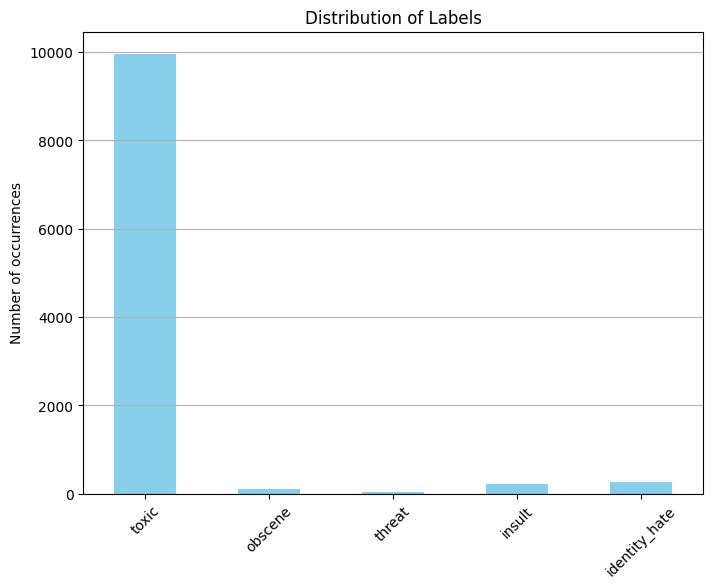

In [41]:
import matplotlib.pyplot as plt

# Distribution of labels
label_cols = ['toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_counts = train[label_cols].sum()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.ylabel('Number of occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

# Distribution of Words

### Train Data

In [42]:
import re

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers and special characters
    text = re.sub(r'[^가-힣a-z\s]', '', text)
    # Tokenization (in this case, just splitting the text into words)
    tokens = text.split()
    return ' '.join(tokens)

# Apply preprocessing to the 'document' column
train['preprocessed_document'] = train['document'].apply(preprocess_text)

# Display the first few rows of preprocessed data
train[['document', 'preprocessed_document']].head()

,document,preprocessed_document
0,아 더빙.. 진짜 짜증나네요 목소리,아 더빙 진짜 짜증나네요 목소리
1,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,교도소 이야기구먼 솔직히 재미는 없다평점 조정
2,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화별반개도 아까움
3,원작의 긴장감을 제대로 살려내지못했다.,원작의 긴장감을 제대로 살려내지못했다
4,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫겟다 납치감금만반복반복이드라마는 가족도없다 연기못하는사람만모엿네


In [1]:
from util.utils import KoreanTextAnalysis

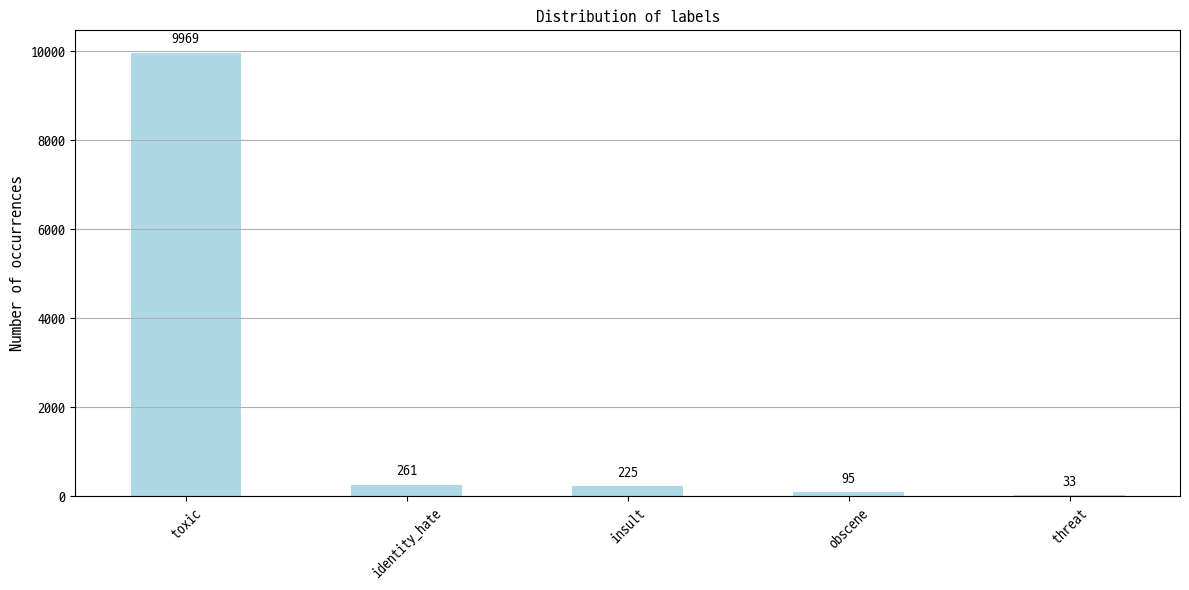

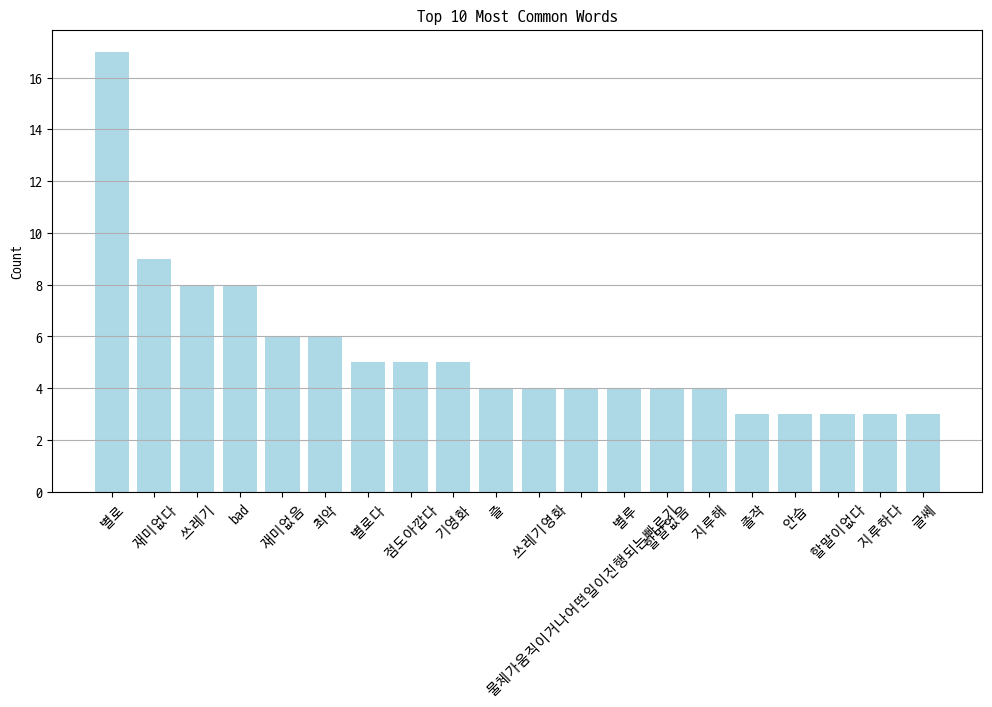

In [2]:
analysis = KoreanTextAnalysis(data_path='./data/ko_train_label.csv')
analysis.preprocess_text()
analysis.label_distribution()
top_words = analysis.word_counts(n=10, plot=True)

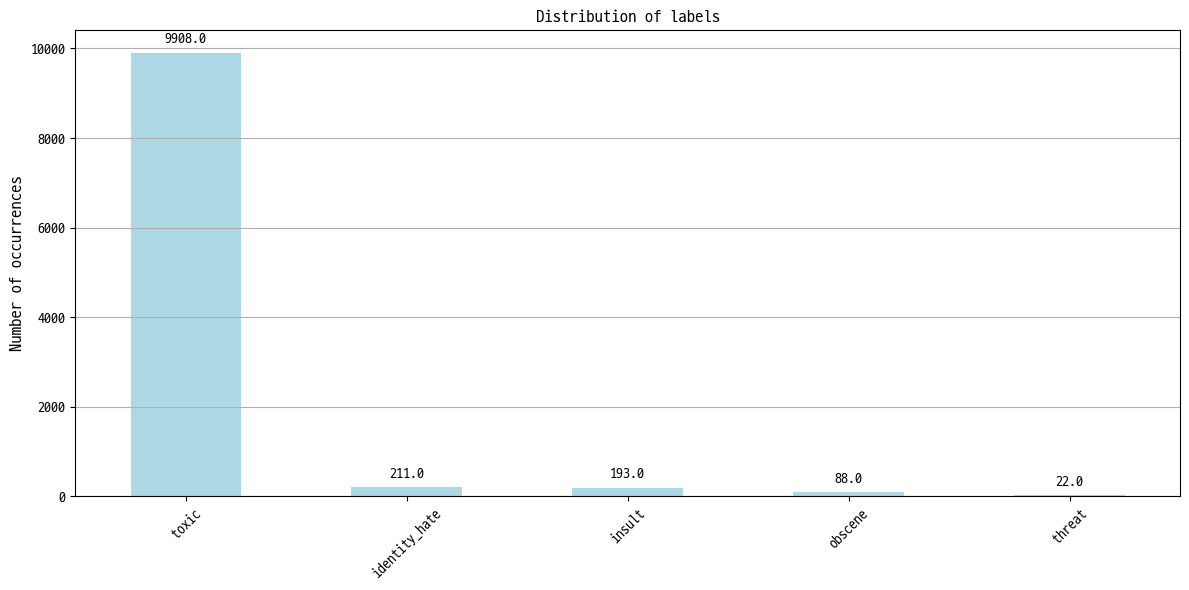

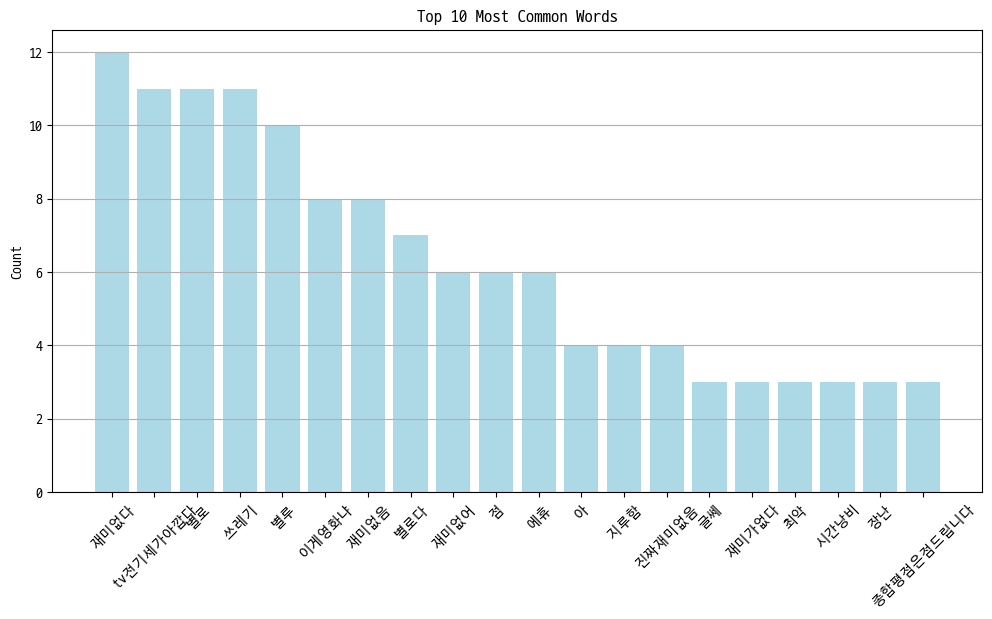

In [3]:
analysis = KoreanTextAnalysis(data_path='./data/ko_test_label.csv')
analysis.preprocess_text()
analysis.label_distribution()
top_words = analysis.word_counts(n=10, plot=True)

In [5]:
import pandas as pd
test = pd.read_csv('./data/ko_test_label.csv')

,id,document,"""toxic""","""obscene""","""threat""","""insult""","""identity_hate""",Unnamed: 7
0,8544678.0,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,1.0,0.0,0.0,0.0,0.0,NaN
1,6825595.0,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,1.0,0.0,0.0,0.0,0.0,NaN
2,6723715.0,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,1.0,0.0,0.0,0.0,0.0,NaN
3,6315043.0,진정한 쓰레기,1.0,0.0,0.0,0.0,0.0,NaN
4,8932678.0,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...,1.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
11408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
